In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

Remember our fuel efficiency dataset?

In [2]:
df_cars = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv')
df_cars.dropna(inplace=True)
df_cars.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [3]:
# get line of best fit
model = ols(formula = 'horsepower ~ weight', data=df_cars)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             horsepower   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.36e-118
Time:                        18:32:01   Log-Likelihood:                -1717.0
No. Observations:                 392   AIC:                             3438.
Df Residuals:                     390   BIC:                             3446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1835      3.570     -3.412      0.001     -19.203      -5.164
weight         0.0392      0.001     33.972      0.000       0.037       0.041
==============================================================================
Omnibus:                       83.255   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.937
Skew:                           0.892   Prob(JB):                     1.11e-68
Kurtosis:                       6.997   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Remember if you are on Colab:

```!pip install matplotlib==3.5```

In [4]:
# we can get the parameters from the model this way as a pandas Series
res.params

Intercept   -12.183485
weight        0.039177
dtype: float64

Line of best fit!

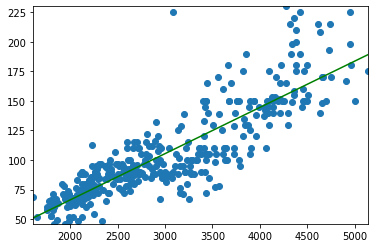

In [5]:
b, m = res.params

# plot the points
plt.scatter(x=df_cars['weight'], y=df_cars['horsepower'])

# plot the line
plt.axline((0, b), slope=m, color='green')

# set limits of the axes (need to do this because we specified the y-int)
plt.xlim(min(df_cars['weight']), max(df_cars['weight']))
plt.ylim(min(df_cars['horsepower']), max(df_cars['horsepower']))
plt.show()

Below we plot the *residual* of a random point with the line of best fit.

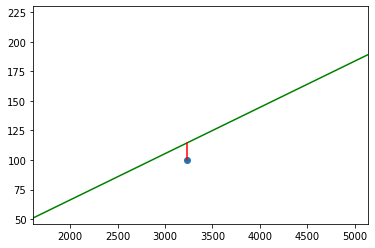

In [6]:
# a random point
idx3 = np.random.randint(low=1, high=len(df_cars)+1, size=1)

# use .item() to get just the value not a Series object
x3 = df_cars.loc[idx3, 'weight'].item()
y3 = df_cars.loc[idx3, 'horsepower'].item()

# plot this point
plt.scatter(x=x3, y=y3)

# plot the line
plt.axline((0, b), slope=m, color='green')

# set limits of the x-axis (need to do this because we specified the y-int)
plt.xlim(min(df_cars['weight']), max(df_cars['weight']))
plt.ylim(min(df_cars['horsepower']), max(df_cars['horsepower']))

# plot the prediction vs. the true value
y_pred = m * x3 + b
plt.plot([x3,x3], [y3, y_pred], color='red')

plt.show()

## Residuals

Assume a linear model

$$
Y = \beta_0 + \beta_1 X
$$

and data $\{(x_1,y_1), \dots, (x_N, y_N)\}$. For a particular $x_i$ let $\hat{y}_i$ be the prediction, i.e. $\beta_0 + \beta_1 x_i$.

- The residuals are given by $\{ \hat{y}_1 - y_i, \hat{y}_2 - y_2, \dots, \hat{y}_N - y_N\}$
- We optimize against the sum of the squared residuals (RSS)

$$
RSS = \sum_{i=1}^N (\hat{y}_i - y_i)^2
$$

- Sometimes you will hear about the **M**ean **S**quared **E**rror, MSE, (or **R**oot **M**ean **S**quared **E**rror, RSME). What happens if we optimize against either of these quantities?

$$
MSE = \frac{\sum_{i=1}^N (\hat{y}_i - y_i)^2}{N} = \frac{RSS}{N}, \,\,\,\,\,\, RMSE = \sqrt{MSE}.
$$

## What are we doing really?

- A **Regression** Model is concerned with how a variable $Y$ varies with respect to another input variable (or variables!) $X$.
- What is the probability distribution of $Y$ for a particular value of $X$?
- So what does *linear* regression really mean?

We assume that our variables are related by the following expression

$$
Y = \beta_0 + \beta_1 X + \epsilon
$$

where we the value of $\epsilon$ is normally distributed with mean 0 for each particular value of $X$.

- What does this mean? Does this make sense for a real-life scenario?

## Assumption 1: Linear Relationship

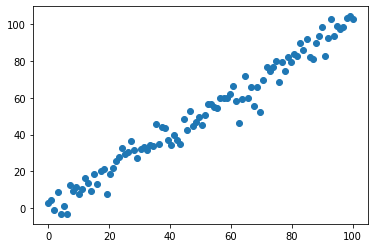

In [7]:
# fake data that follows this relationship
m = 1
b = 0

num_pts = 100

# create num_pts points equally spaced from 0 to 100
X = np.linspace(0, 100, num_pts)

# Gaussian noise
mu, sigma = 0, 5
epsilon = np.random.normal(mu, sigma, num_pts)

# adding random noise to each prediction
Y = m * X + b + epsilon

plt.scatter(x=X, y=Y)
plt.show()

- How does changing the standard deviation change the plot?

The **Pearson Correlation Coefficient** is a statistical measure of the <i>strength of the linear relationship</i> between $Y$ and $X$:

$$
\rho = \frac{Cov(X,Y)}{\sigma_X \sigma_Y} = Cor(X,Y)=\frac{\sum((x_i-\overline{x})(y_i-\overline{y})}{\sqrt{(x_i-\overline{x})^2}\sqrt{(y_i-\overline{y})^2}}
$$

"Normalized Covariance of X and Y"

In [8]:
# outputs the pearson correlation ceofficient between each pair of variables
df_cars.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model_year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              acceleration  model_year  
mpg               0.423329    0.580541  
cylinders        -0.504683   -0.345647  
displacement     -0.543800   -0.369855  
horsepower       -0.689196   -0.416361  
weight           -0.416839   -0.309120  
acceleration      1.000000    0.290316  
model_year        0.290316    1.000000

- What do you notice about this matrix?

In [9]:
# another way of computing it
np.corrcoef(X, Y)

array([[1.        , 0.98474237],
       [0.98474237, 1.        ]])

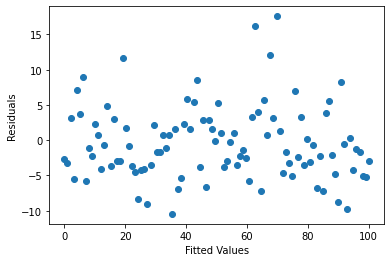

In [10]:
# we can also look at the fitted values vs. the residual values
Y_pred = m * X + b
residuals = Y_pred - Y

plt.scatter(Y_pred, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

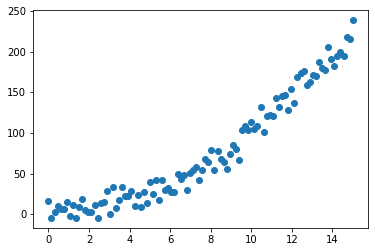

In [11]:
# what happens for non-linear data?
X = np.linspace(0, 15, 100)

# Gaussian noise
mu, sigma = 0, 10
epsilon = np.random.normal(mu, sigma, num_pts)

# a parabola
Y2 = X**2 + epsilon

plt.scatter(X, Y2)
plt.show()

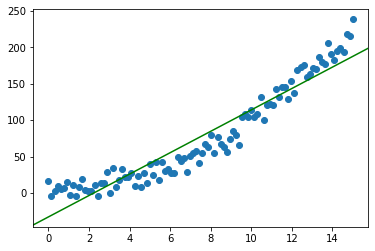

In [12]:
# get the line of best fit
# another version of OLS for numpy data
model = sm.OLS(Y2, sm.add_constant(X), hasconst=True)
res = model.fit()
b, m = res.params

# plot the points
plt.scatter(x=X, y=Y2)

# plot the line
plt.axline((0, b), slope=m, color='green')
plt.show()

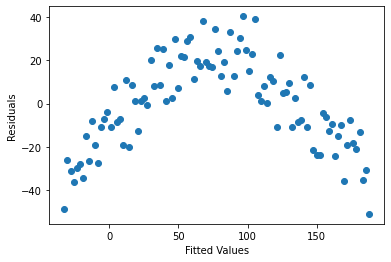

In [13]:
# there is a relationship between the residuals and the value of X!
# oh no!

Y_pred = m * X + b
residuals = Y_pred - Y2

plt.scatter(Y_pred, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## Assumption 2: Homoskedascity
- The error $\epsilon$ is normally distributed with mean 0. 

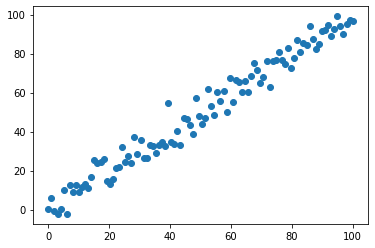

In [14]:
# back to our fake data
m = 1
b = 0

num_pts = 100

# create num_pts points equally spaced from 0 to 100
X = np.linspace(0, 100, num_pts)

# Gaussian noise
mu, sigma = 0, 5
epsilon = np.random.normal(mu, sigma, num_pts)

# adding random noise to each prediction
Y = m * X + b + epsilon

plt.scatter(x=X, y=Y)
plt.show()

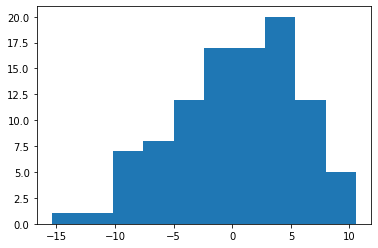

In [15]:
# we can also look at the fitted values vs. the residual values
Y_pred = m * X + b
residuals = Y_pred - Y

plt.hist(residuals)
plt.show()

The following is a Q-Q plot or (Probability Plot since we are comparing against a theoretical distrbution) which plots the ordered residuals against an ordered sample of normally distributed points. 

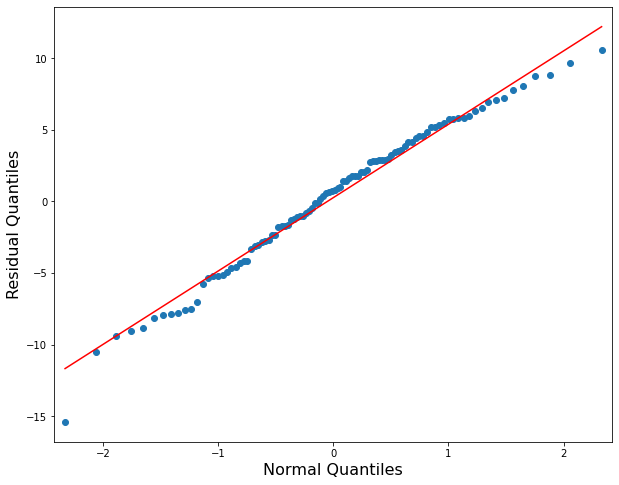

In [16]:
fig,ax = plt.subplots(figsize=(10,8))
sm.qqplot(residuals,line='s',ax=ax) 

# Normals go on the x-axis
plt.xlabel("Normal Quantiles", fontsize=16)

# Residuals on the y-axis
plt.ylabel("Residual Quantiles", fontsize=16)


plt.show() 

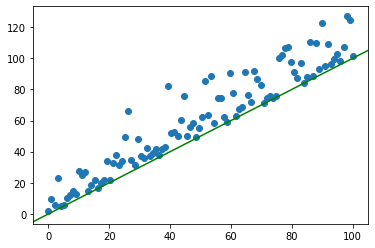

In [17]:
# what is epsilon is distributed differently??

# Gaussian noise
epsilon = np.random.exponential(scale=10, size=num_pts)

# adding random noise to each prediction
Y = m * X + b + epsilon

plt.scatter(x=X, y=Y)
plt.axline((0, b), slope=m, color='green')
plt.show()

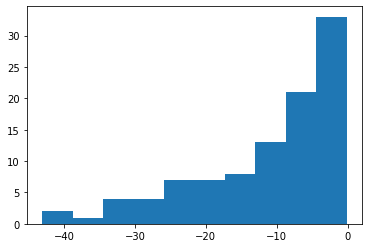

In [18]:
Y_pred = m * X + b
residuals = Y_pred - Y

plt.hist(residuals)
plt.show()

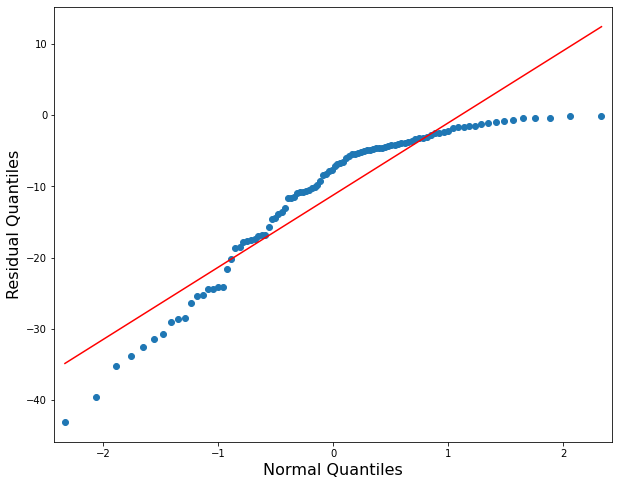

In [19]:
fig,ax = plt.subplots(figsize=(10,8))
sm.qqplot(residuals,line='s',ax=ax) 

# Normals go on the x-axis
plt.xlabel("Normal Quantiles", fontsize=16)

# Residuals on the y-axis
plt.ylabel("Residual Quantiles", fontsize=16)


plt.show() 

## Let's take a break and look at some real data.
- Use what you've learn to identify two variables in the ```diamonds``` dataset which seems to satisfy these two assumptions and two variables which do not seem to satisfy them. Use visual evidence and statistical evidence to support your claim!
- Food for thought: Will I get the same line of best fit if I use squared residuals vs. absolute value of residuals?

In [20]:
df_dia = sns.load_dataset('diamonds')
df_dia.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

## Why Squared Residuals anyways?
* Given the assumptions above, the Gauss-Markov theorem says that the OLS estimator is BLUE (the **B**est **L**inear **U**nbiased **E**stimator).
* The OLS estimator hits the mean for the distribution of $Y$ for each fixed value of $X$.
* Assuming this error distribution, what are the values of $\beta_0$ and $\beta_1$ that maximize the probability that we would see these sample values? This is known as the **M**aximum **L**ikelihood **E**stimate or MLE.

These assumptions are also necessary to do a Hypothesis Test. The default assumption is that there is no linear correlation between two variables.
$$
H_0: \beta_1 = 0 \\
H_1: \beta_1 \neq 0
$$

In [21]:
# looks like 0 is not in the 95% confidence interval, hooray!
model = ols(formula = 'horsepower ~ weight', data=df_cars)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             horsepower   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.36e-118
Time:                        18:32:55   Log-Likelihood:                -1717.0
No. Observations:                 392   AIC:                             3438.
Df Residuals:                     390   BIC:                             3446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1835      3.570     -3.412      0.001     -19.203      -5.164
weight         0.0392      0.001     33.972      0.000       0.037       0.041
==============================================================================
Omnibus:                       83.255   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.937
Skew:                           0.892   Prob(JB):                     1.11e-68
Kurtosis:                       6.997   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multiple Linear Regression
- More variables, more fun

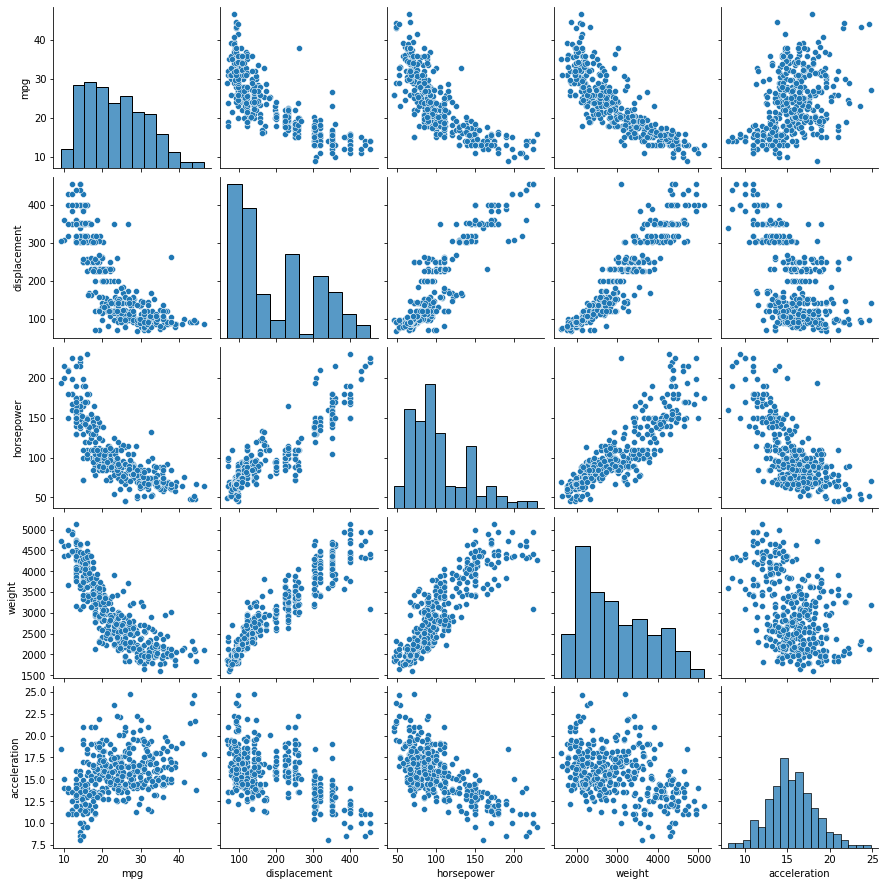

In [22]:
# let's try to predict horsepower again
# why might we want to use multiple variables?
sns.pairplot(df_cars.drop(columns=['cylinders', 'model_year']))

### Multiple Linear Regression

For input variables $X_1, \dots, X_n$ we have the model

$$
Y = \beta_0 + \beta_1 X_1 + \dots + \beta_n X_n,
$$

or more formally

$$
Y = \beta_0 + \beta_1 X_1 + \dots + \beta_n X_n + \epsilon
$$

where epsilon is normally distributed with mean 0 for any fixed tuple of values. The OLS Estimate is still obtained by minimizing the RSS function.

In [23]:
# get the OLS estimator
model = ols(formula = 'horsepower ~ weight + displacement', data=df_cars)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             horsepower   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     833.9
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.14e-141
Time:                        18:33:01   Log-Likelihood:                -1660.3
No. Observations:                 392   AIC:                             3327.
Df Residuals:                     389   BIC:                             3338.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       25.8749      4.547      5.691      0.000      16.936      34.814
weight           0.0096      0.003      3.453      0.001       0.004       0.015
displacement     0.2574      0.023     11.423      0.000       0.213       0.302
==============================================================================
Omnibus:                       22.276   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.692
Skew:                           0.395   Prob(JB):                     1.78e-08
Kurtosis:                       4.249   Cond. No.                     1.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- What happened to the $R^2$ when we included more variables?

## Assumption 3: No Multicolinearity

In [24]:
df_cars.drop(columns=['cylinders', 'model_year']).corr()

mpg  displacement  horsepower    weight  acceleration
mpg           1.000000     -0.805127   -0.778427 -0.832244      0.423329
displacement -0.805127      1.000000    0.897257  0.932994     -0.543800
horsepower   -0.778427      0.897257    1.000000  0.864538     -0.689196
weight       -0.832244      0.932994    0.864538  1.000000     -0.416839
acceleration  0.423329     -0.543800   -0.689196 -0.416839      1.000000

<AxesSubplot:>

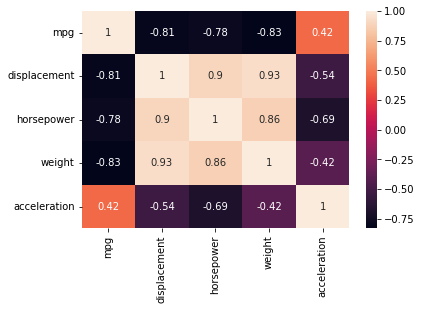

In [25]:
# a nicer display
sns.heatmap(df_cars.drop(columns=['cylinders', 'model_year']).corr(), annot=True)

Why might this induce issues?
- Violates model assumptions (can't use statistical rigor).
- Interpreting the results.

### The F-Test
Score for the Hypothesis test: 
$$
H_0 : \beta_1=\beta_2=\cdots =\beta_p=0,\\
H_1 : \text{at least one $\beta_i\neq 0$}.
$$
All our assumptions must be satisfied for this to be valid!

In [26]:
# how can we interpret this?
model = ols(formula = 'horsepower ~ weight + displacement', data=df_cars)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             horsepower   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     833.9
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.14e-141
Time:                        18:33:07   Log-Likelihood:                -1660.3
No. Observations:                 392   AIC:                             3327.
Df Residuals:                     389   BIC:                             3338.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       25.8749      4.547      5.691      0.000      16.936      34.814
weight           0.0096      0.003      3.453      0.001       0.004       0.015
displacement     0.2574      0.023     11.423      0.000       0.213       0.302
==============================================================================
Omnibus:                       22.276   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.692
Skew:                           0.395   Prob(JB):                     1.78e-08
Kurtosis:                       4.249   Cond. No.                     1.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
df_dia.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [28]:
# let's look at using carat and depth to predict diamond price
# I'm going to take a sample to make this harder!
df = df_dia.sample(n=100).drop(columns=['cut','color','clarity','table', 'x', 'y', 'z'])
df.head()

carat  depth  price
6803    1.05   61.7   4116
9499    1.01   63.7   4610
36367   0.39   61.7    939
8769    1.04   62.8   4467
906     0.70   59.1   2877

<AxesSubplot:>

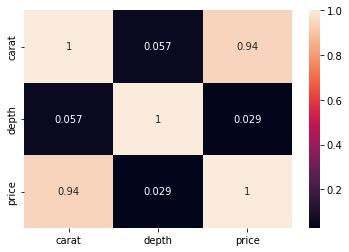

In [29]:
sns.heatmap(df.corr(), annot=True)

In [30]:
model = ols(formula = 'price ~ depth + carat', data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     366.7
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           5.95e-46
Time:                        18:33:15   Log-Likelihood:                -855.24
No. Observations:                 100   AIC:                             1716.
Df Residuals:                      97   BIC:                             1724.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1926.5240   5861.470      0.329      0.743   -9706.871    1.36e+04
depth        -69.3582     95.180     -0.729      0.468    -258.264     119.548
carat       7807.9276    288.457     27.068      0.000    7235.420    8380.435
==============================================================================
Omnibus:                       61.213   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              506.020
Skew:                           1.726   Prob(JB):                    1.32e-110
Kurtosis:                      13.466   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Does this mean that we can conclude that ```depth``` is a good predicter here?

## Categorical Variables

In [31]:
# back to the penguins!
df_penguins = sns.load_dataset('penguins')
df_penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

### How can we create a linear model which takes the ```sex``` variable into account?
- One-Hot Encode

In [32]:
# lambda function time!
# amazing Python feature
df_penguins['is_male'] = df_penguins['sex'].apply(lambda x : int(x == 'Male'))

In [33]:
df_penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  is_male  
0       3750.0    Male        1  
1       3800.0  Female        0  
2       3250.0  Female        0  
3          NaN     NaN        0  
4       3450.0  Female        0

Let's create a model here:

$$
Y_{mass} = \beta_0 + \beta_1 X_{flipper} + \beta_2 X_{is\_male}
$$

In [34]:
model = ols(formula = 'body_mass_g ~ flipper_length_mm + is_male', data=df_penguins)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     691.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.53e-120
Time:                        18:33:24   Log-Likelihood:                -2493.9
No. Observations:                 342   AIC:                             4994.
Df Residuals:                     339   BIC:                             5005.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5327.2009    281.739    -18.908      0.000   -5881.378   -4773.024
flipper_length_mm    46.5787      1.420     32.795      0.000      43.785      49.372
is_male             347.2632     39.891      8.705      0.000     268.797     425.729
==============================================================================
Omnibus:                        0.303   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.412
Skew:                           0.057   Prob(JB):                        0.814
Kurtosis:                       2.874   Cond. No.                     2.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Lab 2

1. Create a scatter plot with flipper length on the x-axis and body mass on the y-axis. Color the points according to the penguin's sex.
2. Find the line of best fit for the penguins dataset to predict body mass from flipper length. Plot this on the plot from Q1.
3. Find two lines of best fit: one for the male and one for the female penguins. Plot this on the plot from Q1.
4. Take the line of best fit from above which used both flipper length and ```is_male```. Plot this line with $X_{is\_male}=0$ and with $X_{is\_male}=1$. What do you notice?

## Next Time
- Quiz 2 to start class
- We'll talk about interpreting, evaluating, and troubleshooting your model.
- Bootstrapping I hope!

In [35]:
#get dummies variables
pd.get_dummies(df_penguins['species'])

Adelie  Chinstrap  Gentoo
0         1          0       0
1         1          0       0
2         1          0       0
3         1          0       0
4         1          0       0
..      ...        ...     ...
339       0          0       1
340       0          0       1
341       0          0       1
342       0          0       1
343       0          0       1

[344 rows x 3 columns]